Import Packages

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.feature_selection import mutual_info_classif
from scipy.stats import chi2_contingency, kruskal

# Importing Dataset

In [ ]:
#grad = pd.read_csv('/content/sds_datathon_gradsingapore')

In [ ]:
grad = pd.read_excel('/content/sds_datathon_gradsingapore.xlsx')
grad.head()

,Response ID,Time Started,Date Submitted,Status,Language,SessionID,User Agent,Tags,IP Address,Longitude,...,Types of roles available:What do you wish to learn more about regarding the organisation as an employer? (Pick 3),Career progression and development:What do you wish to learn more about regarding the organisation as an employer? (Pick 3),Compensation and benefits:What do you wish to learn more about regarding the organisation as an employer? (Pick 3),Work-life balance and culture:What do you wish to learn more about regarding the organisation as an employer? (Pick 3),Application and interview process:What do you wish to learn more about regarding the organisation as an employer? (Pick 3),Other - Write In (Required):What do you wish to learn more about regarding the organisation as an employer? (Pick 3),Other - Write In (Required):What do you wish to learn more about regarding the organisation as an employer? (Pick 3) .1,"On a scale from 1 to 10 (1 – Low, 10 – High), how would you rate the attractiveness of the organisation as an employer?",Which of these factors would most motivate you to apply for a position at the organisation?,Other - Write In (Required):Which of these factors would most motivate you to apply for a position at the organisation?
0,19,2025-09-02 15:03:01,2025-09-02 15:03:40,Partial,English,1756796577_68b696a123dd27.81295289,Mozilla/5.0 (iPhone; CPU iPhone OS 18_6_2 like...,NaN,104.28.119.112,-97.821999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20,2025-09-02 15:15:32,2025-09-02 15:16:59,Disqualified,English,1756797328_68b699901c4cf6.89118890,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,NaN,57.140.24.26,4.344700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21,2025-09-02 15:18:01,2025-09-02 15:19:30,Disqualified,English,1756797478_68b69a26c5d785.44808899,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,NaN,57.140.24.26,4.344700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,22,2025-09-03 15:25:18,2025-09-03 15:27:05,Complete,English,1756884314_68b7ed5a14f861.00788803,Mozilla/5.0 (Linux; Android 15; K) AppleWebKit...,NaN,119.234.8.156,103.839302,...,Types of roles available,Career progression and development,NaN,NaN,Application and interview process,NaN,NaN,8.0,Meaningful work impact,NaN
4,23,2025-09-03 15:34:31,2025-09-03 15:34:31,Partial,English,1756884864_68b7ef80372683.27687311,Mozilla/5.0 (iPhone; CPU iPhone OS 18_5 like M...,NaN,194.11.199.111,-77.644302,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Cleaning / Prep

drop unused columns

In [ ]:
grad_clean = grad.copy()
grad_clean.drop_duplicates(inplace=True)
grad_clean = grad_clean.drop(columns = ['Language', 'SessionID', 'User Agent', 'Tags', 'IP Address',
                                        'Longitude', 'Latitude', 'State/Region', 'Postal'])
grad_clean.shape

(2614, 23)

In [ ]:
grad_clean.columns

Index(['Response ID', 'Time Started', 'Date Submitted', 'Status', 'Country',
       'City',
       'Which higher education institution do you or did you study at?',
       'What is your current year of study as of 2025?',
       'What will be your highest qualification when you graduate?',
       'Which of the following best describes the main subject that you are studying? ',
       'Please indicate your nationality.', 'What is your gender?',
       'Which of these statements best describes your current perception of the organisation as an employer?',
       'Types of roles available:What do you wish to learn more about regarding the organisation as an employer? (Pick 3)  ',
       'Career progression and development:What do you wish to learn more about regarding the organisation as an employer? (Pick 3)  ',
       'Compensation and benefits:What do you wish to learn more about regarding the organisation as an employer? (Pick 3)  ',
       'Work-life balance and culture:What do you wi

rename columns

In [ ]:
grad_clean.columns = ['ID', 'time_started', 'time_submitted', 'status', 'country', 'city',
                    'university', 'year_of_Study', 'highest_qualification', 'major', 'nationality', 'gender',
                    'perception', 'types_of_roles', 'career_progression', 'compensation', 'worklife_balance', 'interview_process',
                    'other_1', 'other_2', 'scale(1-10)', 'motivation_factor', 'other']
grad_clean.head(2)

,ID,time_started,time_submitted,status,country,city,university,year_of_Study,highest_qualification,major,...,types_of_roles,career_progression,compensation,worklife_balance,interview_process,other_1,other_2,scale(1-10),motivation_factor,other
0,19,2025-09-02 15:03:01,2025-09-02 15:03:40,Partial,United States,NaN,National University of Singapore (NUS),Year 4,Bachelor's Degree,"Business/Management (Accounting, Finance, Mark...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20,2025-09-02 15:15:32,2025-09-02 15:16:59,Disqualified,Belgium,NaN,Singapore Management University (SMU),Year 3,Bachelor's Degree,Economics,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# EDA

In [ ]:
proportion = grad_clean['status'].value_counts(normalize=True)
count = grad_clean['status'].value_counts()
print(proportion)
print(count)

status
Complete        0.706963
Disqualified    0.177888
Partial         0.115149
Name: proportion, dtype: float64
status
Complete        1848
Disqualified     465
Partial          301
Name: count, dtype: int64


Insights: 11.5% of the survey response were partial, 17.8% disqualified, 70.6% complete

In [ ]:
grad_clean['time_taken'] = grad_clean['time_submitted'] - grad_clean['time_started']
grad_clean

,ID,time_started,time_submitted,status,country,city,university,year_of_Study,highest_qualification,major,...,career_progression,compensation,worklife_balance,interview_process,other_1,other_2,scale(1-10),motivation_factor,other,time_taken
0,19,2025-09-02 15:03:01,2025-09-02 15:03:40,Partial,United States,NaN,National University of Singapore (NUS),Year 4,Bachelor's Degree,"Business/Management (Accounting, Finance, Mark...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:00:39
1,20,2025-09-02 15:15:32,2025-09-02 15:16:59,Disqualified,Belgium,NaN,Singapore Management University (SMU),Year 3,Bachelor's Degree,Economics,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:01:27
2,21,2025-09-02 15:18:01,2025-09-02 15:19:30,Disqualified,Belgium,NaN,Singapore Management University (SMU),Year 3,Bachelor's Degree,Economics,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:01:29
3,22,2025-09-03 15:25:18,2025-09-03 15:27:05,Complete,Singapore,Singapore,Nanyang Technological University (NTU),Year 4,Bachelor's Degree,Economics,...,Career progression and development,NaN,NaN,Application and interview process,NaN,NaN,8.0,Meaningful work impact,NaN,0 days 00:01:47
4,23,2025-09-03 15:34:31,2025-09-03 15:34:31,Partial,United States,Ashburn,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2609,2628,2025-11-13 11:04:35,2025-11-13 11:31:13,Complete,Singapore,Bukit Batok,National University of Singapore (NUS),Year 3,Bachelor's Degree,"Natural Science (Physics, Chemistry, Biology, ...",...,NaN,Compensation and benefits,Work-life balance and culture,NaN,NaN,NaN,7.0,Job security,NaN,0 days 00:26:38
2610,2629,2025-11-13 11:16:03,2025-11-13 11:19:03,Complete,Singapore,Singapore,National University of Singapore (NUS),Year 2,Bachelor's Degree,"Natural Science (Physics, Chemistry, Biology, ...",...,Career progression and development,Compensation and benefits,Work-life balance and culture,NaN,NaN,NaN,7.0,Meaningful work impact,NaN,0 days 00:03:00
2611,2630,2025-11-13 13:02:23,2025-11-13 13:02:56,Partial,Singapore,Singapore,National University of Singapore (NUS),Year 2,Bachelor's Degree,Mathematical Science/Statistics,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:00:33
2612,2631,2025-11-13 14:28:12,2025-11-13 14:29:54,Disqualified,Singapore,Singapore,National University of Singapore (NUS),Year 1,Bachelor's Degree,Mathematical Science/Statistics,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:01:42


In [ ]:
grad_time = grad_clean[['status','time_taken']].copy()
grad_time.groupby('status')['time_taken'].describe()

,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
Complete,1848,0 days 04:02:47.720238095,1 days 17:21:46.086488894,0 days 00:00:18,0 days 00:01:06,0 days 00:01:31,0 days 00:02:28.250000,41 days 13:18:08
Disqualified,465,0 days 02:51:13.974193548,2 days 00:25:34.098696863,0 days 00:00:13,0 days 00:00:34,0 days 00:00:46,0 days 00:01:05,43 days 10:12:23
Partial,301,0 days 00:27:26.611295681,0 days 03:41:12.150426804,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:03,2 days 05:56:13


For completed surveys, the minimum time to fill in is 18 seconds, maximum time is 41 days 13 hours 18 minutes 8 seconds, with an average time of 4 hours 2 minutes 48 seconds.

For disqualified surveys, the minimum time to fill in is 13 seconds, maximum time is 43 days 10 hours 12 minutes 23 seconds, with an average time of 2 hours 51 minutes 14 seconds.

For partially filled surveys, the minimum time taken is 0 second, maximum time is 2 days 5 hours 56 minutes 13 seconds, with an average time of 27 minutes 27 seconds.

[think the 0 days 0 seconds one bs jd outlier dan dibuang..]

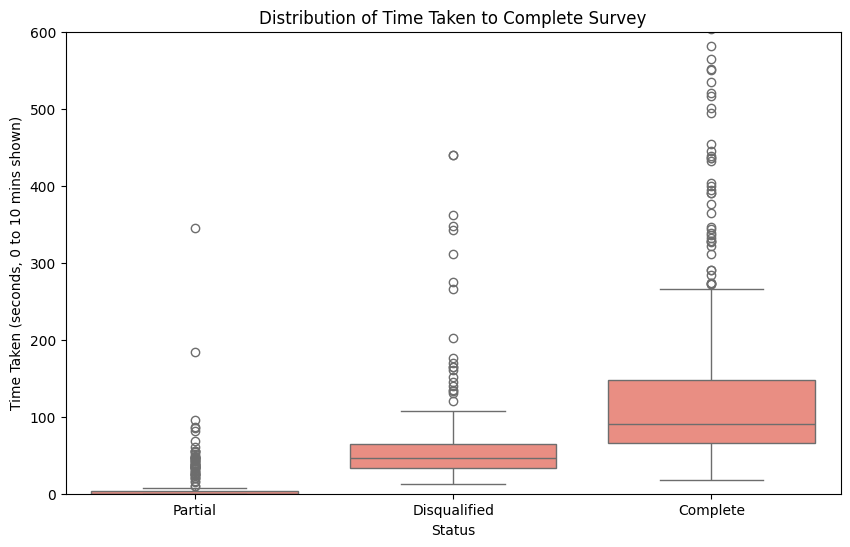

In [ ]:
plot_grad_time = grad_time.copy() #[grad_time['status'] == 'Partial'].copy()
plot_grad_time['time_taken_seconds'] = plot_grad_time['time_taken'].dt.total_seconds()
# Create the box plot for complete surveys
plt.figure(figsize=(10, 6))
sns.boxplot(x='status', y='time_taken_seconds', data=plot_grad_time, color='salmon')
plt.title('Distribution of Time Taken to Complete Survey')
plt.xlabel('Status')
plt.ylabel('Time Taken (seconds, 0 to 10 mins shown)')
plt.ylim(0, 600)
plt.show()

tidying the data

In [ ]:
grad_tidy = grad_clean[['ID', 'status', 'perception', 'types_of_roles', 'career_progression', 'compensation', 'worklife_balance', 'interview_process',
                    'other_1', 'other_2', 'scale(1-10)', 'motivation_factor', 'other']].copy()
grad_tidy = grad_tidy[grad_tidy['status'] == 'Complete'].reset_index(drop=True)
grad_tidy = grad_tidy.drop(columns = ['status'])
grad_tidy = grad_tidy.melt(id_vars = ['ID', 'perception', 'scale(1-10)', 'motivation_factor', 'other'],
                           var_name = 'pick3_question', value_name = 'answer').dropna(subset = 'answer')
grad_tidy[grad_tidy['ID'].isin([28])]

,ID,perception,scale(1-10),motivation_factor,other,pick3_question,answer
1849,28,"I recognise the organisation by name, but don’...",6.0,Meaningful work impact,NaN,career_progression,Career progression and development
3697,28,"I recognise the organisation by name, but don’...",6.0,Meaningful work impact,NaN,compensation,Compensation and benefits
5545,28,"I recognise the organisation by name, but don’...",6.0,Meaningful work impact,NaN,worklife_balance,Work-life balance and culture


In [ ]:
grad_tidy['answer'].value_counts()

,count
answer,
Types of roles available,1413
Career progression and development,1387
Compensation and benefits,1190
Work-life balance and culture,1015
Application and interview process,534
Other - Write In (Required),5
Qualifications required (eg. are people from all backgrounds accepted?),1
not interested,1
not really interested,1


In [ ]:
numeric_cols = grad_clean.select_dtypes(include='number').columns
categorical_cols = grad_clean.select_dtypes(exclude='number').columns

print('\nNumeric Summary (mean/median/std/quartiles):')
print(grad_clean[numeric_cols].describe().T)

print('\nCategorical Summary (counts, top, freq):')
print(grad_clean[categorical_cols].describe().T)

print('\nTop 5 categories per categorical column:')
for col in categorical_cols:
    print(f'\n{col}')
    print(grad_clean[col].value_counts(dropna=False).head(5))


Numeric Summary (mean/median/std/quartiles):
              count                       mean                        std  \
ID           2614.0                     1325.5                 754.741126   
scale(1-10)  1848.0                   6.280303                   2.071646   
time_taken     2614  0 days 03:25:16.057765876  1 days 16:21:24.411006805   

                         min                     25%              50%  \
ID                      19.0                  672.25           1325.5   
scale(1-10)              1.0                     5.0              6.0   
time_taken   0 days 00:00:00  0 days 00:00:45.250000  0 days 00:01:15   

                         75%               max  
ID                   1978.75            2632.0  
scale(1-10)              8.0              10.0  
time_taken   0 days 00:02:03  43 days 10:12:23  

Categorical Summary (counts, top, freq):
               count                           mean                  min  \
time_started    2614  2025-10-28 09:13

Categorical vs Status


Counts by country
status          Complete  Disqualified  Partial
country                                        
Australia              2             0        2
Belgium                0             2        0
Canada                 1             0        1
China                  1             0        1
Czech Republic         1             0        0
Denmark                0             1        0
Israel                 2             0        0
Netherlands            1             0        0
Singapore           1710           443      275
United Kingdom         1             0        0
United States        116            16       22


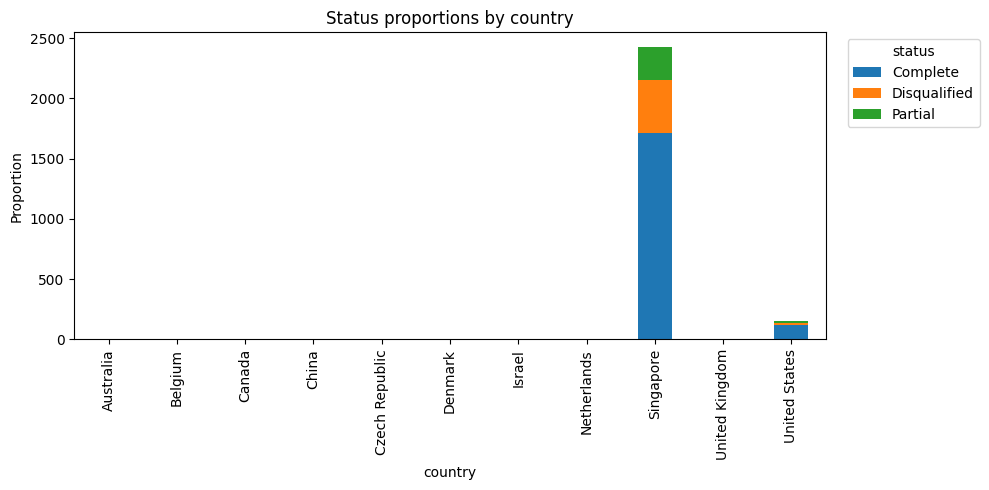


Counts by year_of_Study
status         Complete  Disqualified  Partial
year_of_Study                                 
Others                0            24        0
Year 1              654           181       26
Year 2              541           113       17
Year 3              386           105       16
Year 4              267            40        4


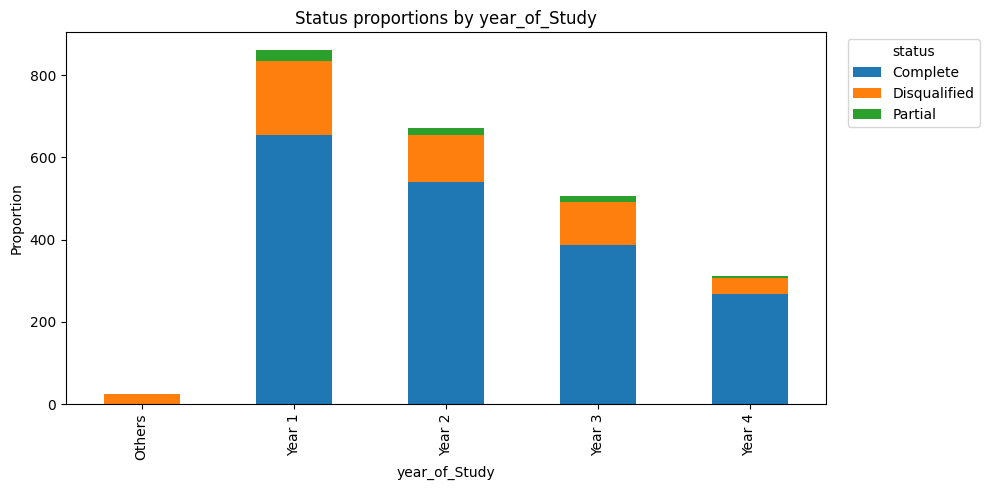


Counts by highest_qualification
status                                    Complete  Disqualified  Partial
highest_qualification                                                    
Bachelor's Degree                             1848           359       62
Doctoral Degree                                  0            22        0
Master's Degree                                  0            38        1
Masters of Business Administration (MBA)         0             4        0
Postgraduate certificate/diploma                 0            40        0


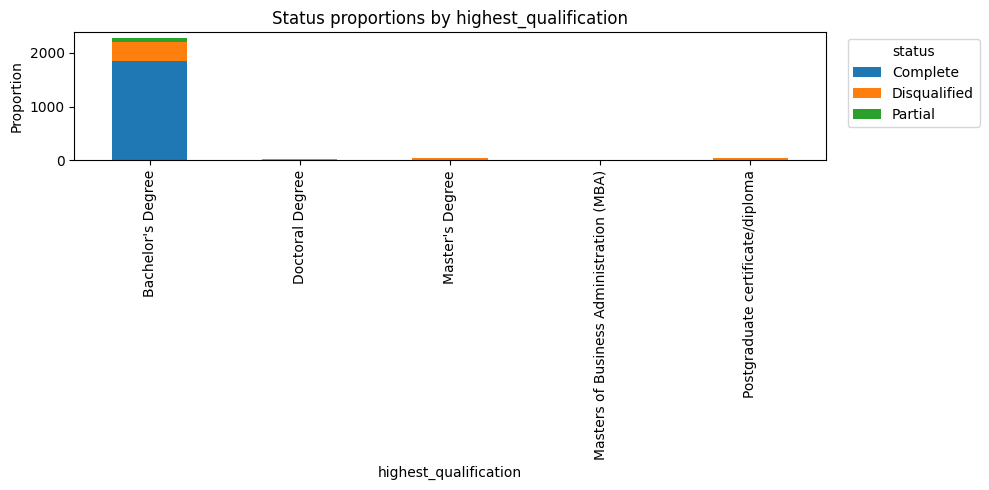


Counts by major
status                                              Complete  Disqualified  \
major                                                                        
Agriculture, Veterinary Science and related sub...        32             6   
Architecture, Building and Planning                       48            12   
Business/Management (Accounting, Finance, Marke...       236            40   
Creative Arts and Design                                  24             5   
Economics                                                118            19   
Education/Teaching                                        24             3   
Engineering (Electrical/Electronics, Mechanical...       139            32   
English                                                   11             3   
Geography and Environmental Science                       49             0   
Historical/Philosophical Science                           9             1   
IT and Technology                              

/tmp/ipython-input-3891726321.py:21: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


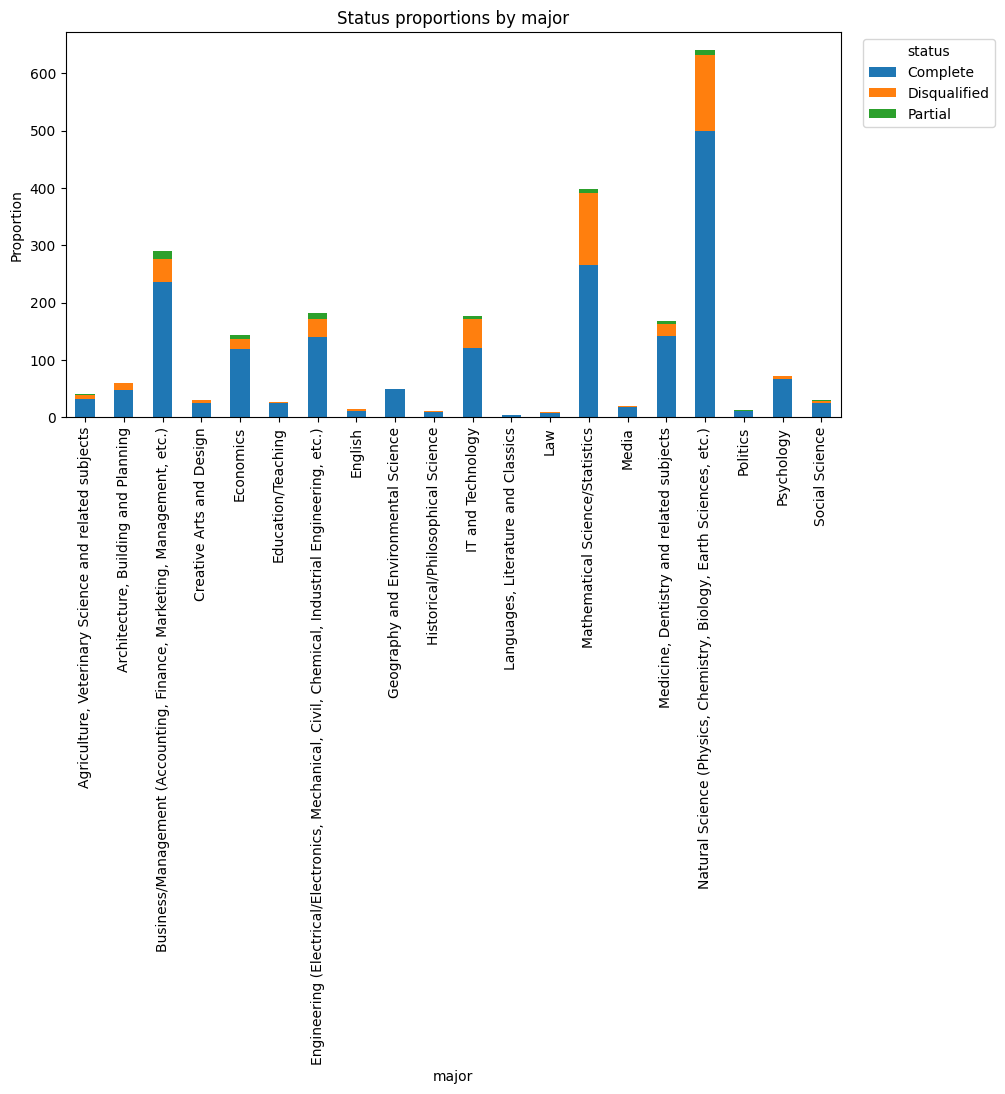


Counts by gender
status             Complete  Disqualified  Partial
gender                                            
Female                 1108           255       34
Male                    686           189       28
Prefer not to say        54            18        1


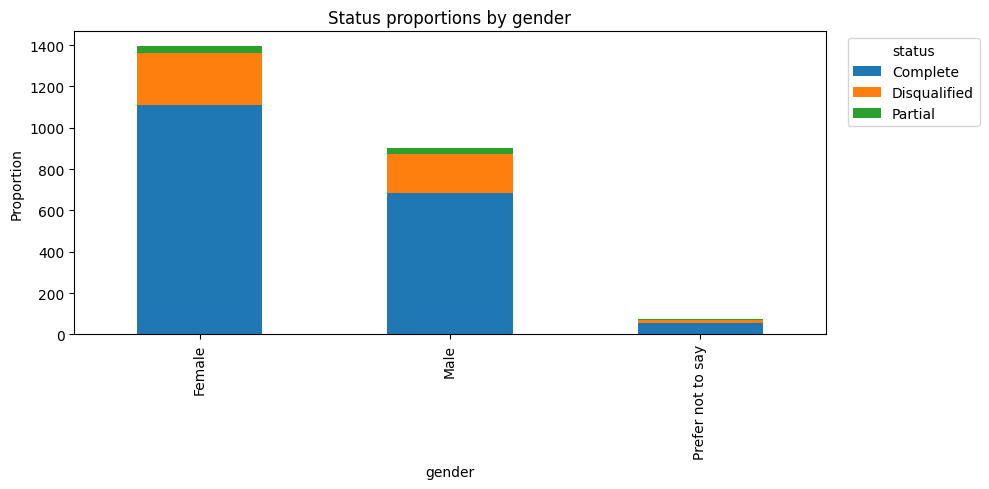


Counts by perception
status                                              Complete  Partial
perception                                                           
I have a general positive impression of the org...       555        0
I recognise the organisation by name, but don’t...       564        0
I’m familiar with the organisation and would co...       374        0
I’m not familiar enough with the organisation t...       355        1


/tmp/ipython-input-3891726321.py:21: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


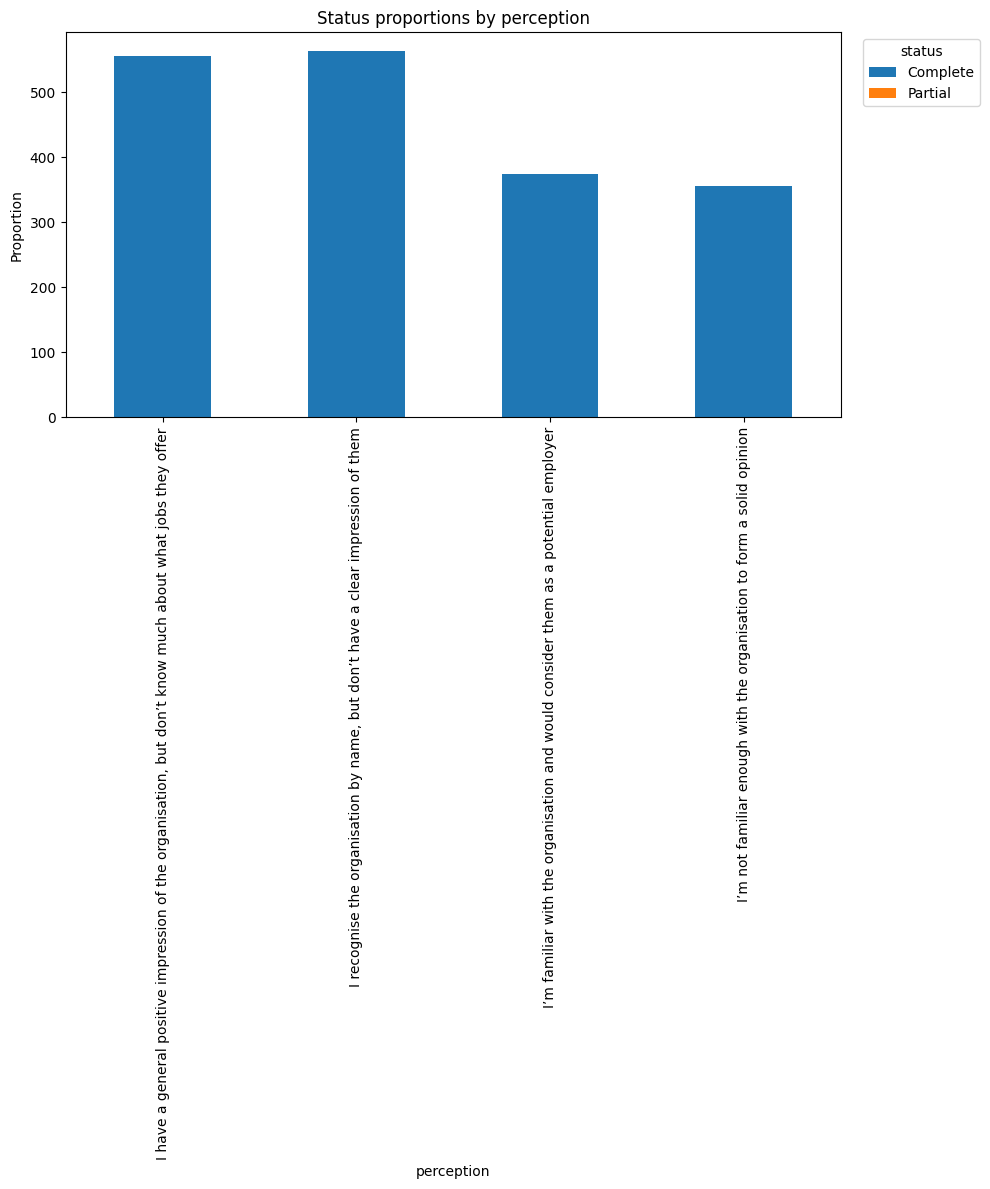

In [ ]:
categorical_cols = ['country', 'year_of_Study', 'highest_qualification','major', 'gender', 'perception']
status_col = 'status'
for col in categorical_cols:
    counts = (
        grad_clean
        .groupby([col, status_col])
        .size()
        .unstack(fill_value=0)
        .sort_index()
    )
    proportions = counts.div(counts.sum(axis=1), axis=0)

    print(f'\nCounts by {col}')
    print(counts)

    ax = counts.plot(kind='bar', stacked=True, figsize=(10, 5))
    ax.set_title(f'Status proportions by {col}')
    ax.set_ylabel('Proportion')
    ax.set_xlabel(col)
    ax.legend(title=status_col, bbox_to_anchor=(1.02, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# What Drives Employer Attractiveness?

using perception and scale(0-10), to understand what drives employer attractiveness

In [ ]:
perception_rating_data = grad_clean[grad_clean['status'] == 'Complete'][['perception', 'scale(1-10)']].copy()
perception_rating_data.dropna(subset=['perception', 'scale(1-10)'], inplace=True)
perception_rating_data.head()

,perception,scale(1-10)
3,I’m familiar with the organisation and would c...,8.0
9,"I recognise the organisation by name, but don’...",6.0
13,I have a general positive impression of the or...,7.0
16,I have a general positive impression of the or...,5.0
17,"I recognise the organisation by name, but don’...",8.0


In [ ]:
perception_stats = perception_rating_data.groupby('perception')['scale(1-10)'].agg(
    mean='mean',
    median='median',
    std='std',
    count='count',
    Q1=lambda x: x.quantile(0.25),
    Q3=lambda x: x.quantile(0.75)
)
perception_stats

,mean,median,std,count,Q1,Q3
perception,,,,,,
"I have a general positive impression of the organisation, but don’t know much about what jobs they offer",6.672072,7.0,1.695352,555,6.0,8.0
"I recognise the organisation by name, but don’t have a clear impression of them",5.877660,6.0,1.804159,564,5.0,7.0
I’m familiar with the organisation and would consider them as a potential employer,7.371658,8.0,2.191465,374,6.0,9.0
I’m not familiar enough with the organisation to form a solid opinion,5.157746,5.0,2.153152,355,4.0,6.0


**Reasoning**:
The previous code failed because `yerr` in `seaborn.barplot` was not correctly interpreted by the underlying `matplotlib.bar` function when plotting pre-aggregated data. The error message indicated that `yerr` (shape: (4,)) did not match `y` (shape: (1,)) for individual bar plotting calls. To fix this, I will convert the standard deviation Series into a list of single-element lists, ensuring that each bar's error value is passed in a `(1,)` shape, which `matplotlib` expects per bar. I will also address the `FutureWarning` by explicitly setting `hue` and `legend` parameters.



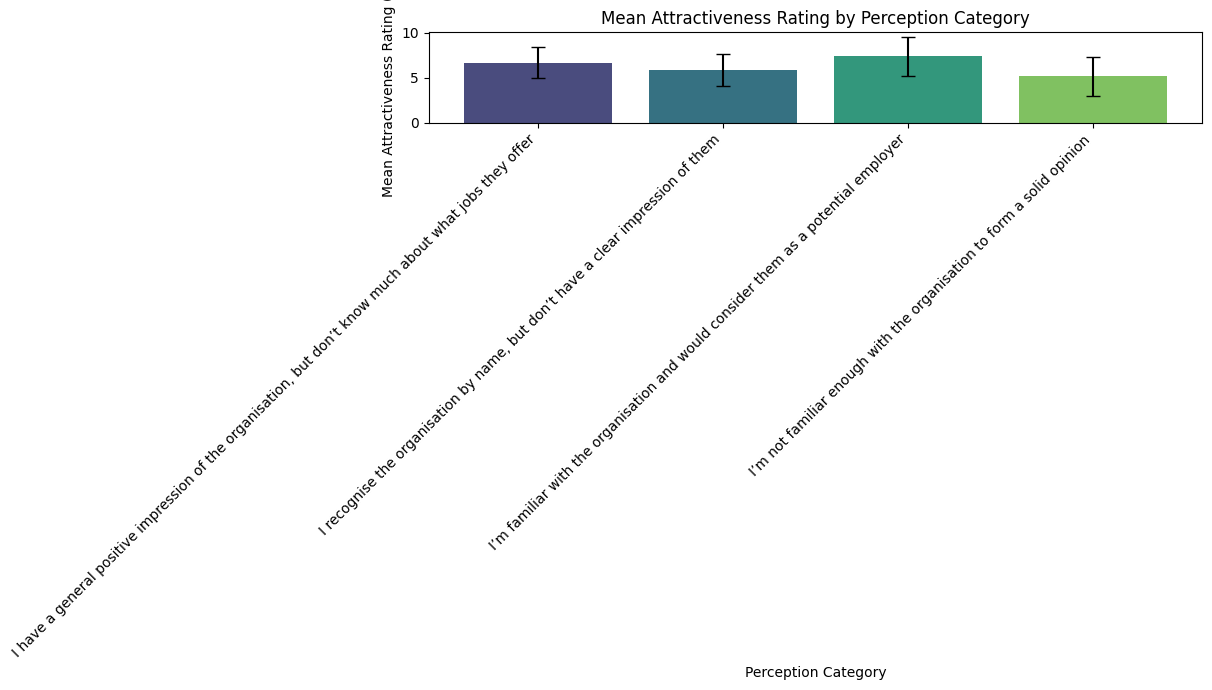

In [ ]:
perception_stats_reset = perception_stats.reset_index()

plt.figure(figsize=(12, 7))

# Plot bars without yerr argument in seaborn
ax = sns.barplot(
    x='perception',
    y='mean',
    data=perception_stats_reset,
    palette='viridis',
    hue='perception',
    legend=False
)

# Manually add error bars using plt.errorbar
# Get the x-coordinates of the bars from the seaborn barplot patches
x_coords = [p.get_x() + p.get_width() / 2 for p in ax.patches]

plt.errorbar(
    x=x_coords,
    y=perception_stats_reset['mean'],
    yerr=perception_stats_reset['std'],
    fmt='none', # Do not draw lines connecting error points
    capsize=5,  # Add caps to the error bars
    color='black' # Color of the error bars
)

plt.title('Mean Attractiveness Rating by Perception Category')
plt.xlabel('Perception Category')
plt.ylabel('Mean Attractiveness Rating (1-10)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Association between categoricals and Mutual Information to Status

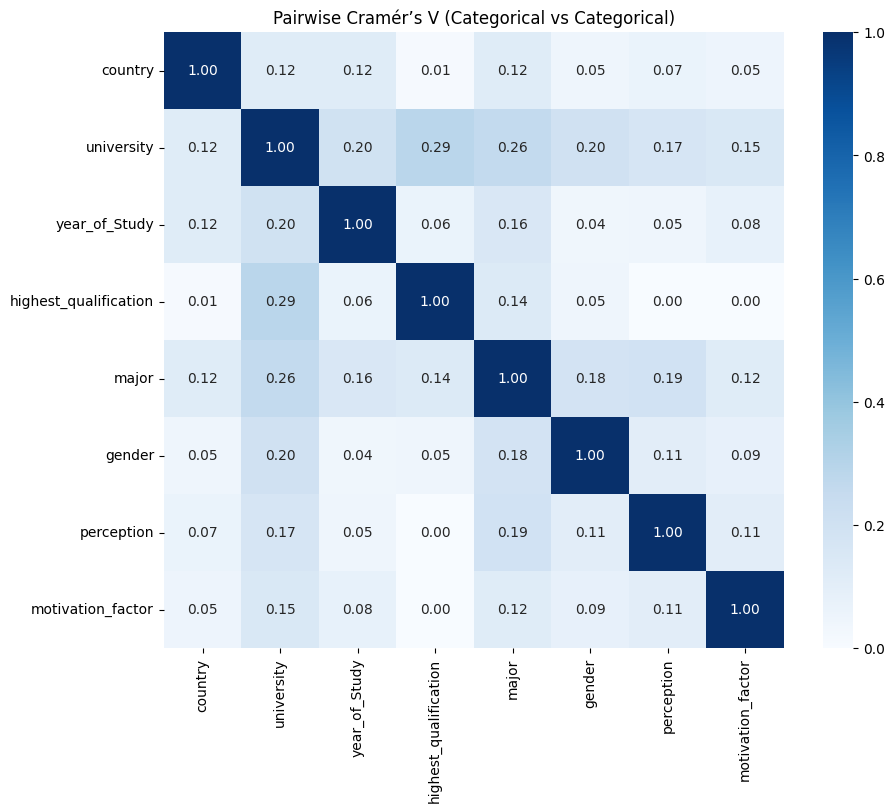


scale(1-10) - Outlier removal by IQR:
  Original count: 2614
  After outlier removal: 1848
  Outliers removed: 766
  Range: [0.50, 12.50]

Kruskal-Wallis (numeric vs status):

Top MI features:
scale(1-10)                                                                                      0.609321
time_taken                                                                                       0.358470
perception_I recognise the organisation by name, but don’t have a clear impression of them       0.094679
perception_I’m not familiar enough with the organisation to form a solid opinion                 0.052320
perception_I’m familiar with the organisation and would consider them as a potential employer    0.049780
year_of_Study_Year 2                                                                             0.035718
highest_qualification_Master's Degree                                                            0.032242
major_Education/Teaching                                        

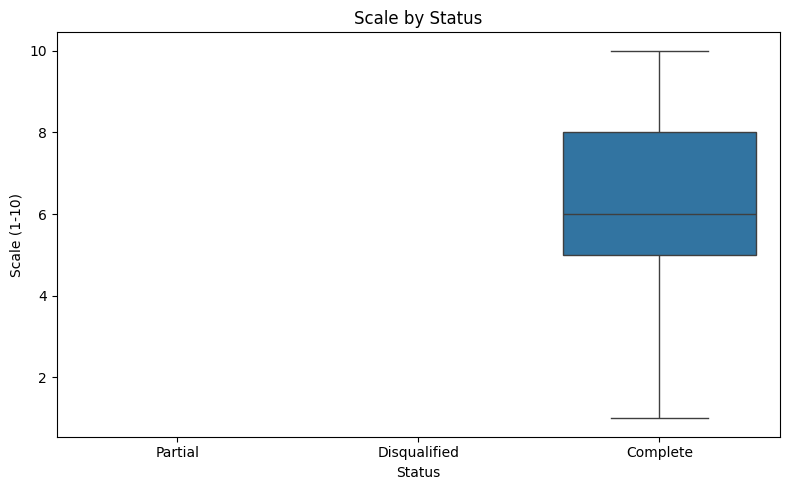

In [ ]:
cat_cols = ['country', 'university', 'year_of_Study', 'highest_qualification',
            'major', 'gender', 'perception', 'motivation_factor']

def cramers_v(x, y):
    ct = pd.crosstab(x, y)
    if ct.size == 0 or min(ct.shape) <= 1:
        return 0.0
    chi2 = chi2_contingency(ct)[0]
    n = ct.values.sum()
    return np.sqrt(chi2 / (n * (min(ct.shape) - 1)))

cramer_matrix = pd.DataFrame(index=cat_cols, columns=cat_cols, dtype=float)
for c1 in cat_cols:
    for c2 in cat_cols:
        cramer_matrix.loc[c1, c2] = cramers_v(grad_clean[c1], grad_clean[c2])

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cramer_matrix, annot=True, fmt='.2f', cmap='Blues')
plt.title("Pairwise Cramér’s V (Categorical vs Categorical)")
plt.show()

numerical_cols = ['scale(1-10)']
num_results = []
for col in numerical_cols:
    if col in grad_clean.columns:
        # Remove outliers using IQR method
        Q1 = grad_clean[col].quantile(0.25)
        Q3 = grad_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        grad_clean_no_outliers = grad_clean[(grad_clean[col] >= lower_bound) & (grad_clean[col] <= upper_bound)].copy()

        print(f"\n{col} - Outlier removal by IQR:")
        print(f"  Original count: {len(grad_clean)}")
        print(f"  After outlier removal: {len(grad_clean_no_outliers)}")
        print(f"  Outliers removed: {len(grad_clean) - len(grad_clean_no_outliers)}")
        print(f"  Range: [{lower_bound:.2f}, {upper_bound:.2f}]")

        groups = [g[col].dropna() for _, g in grad_clean.groupby(status_col)]
        if all(len(g) > 0 for g in groups):
            stat, p = kruskal(*groups)
            num_results.append((col, stat, p))

print("\nKruskal-Wallis (numeric vs status):")
for col, stat, p in num_results:
    print(f"{col}: H={stat:.3f}, p={p:.4f}")

grad_clean_enc = grad_clean.copy()

# Convert 'time_taken' to total seconds
if 'time_taken' in grad_clean_enc.columns:
    grad_clean_enc['time_taken'] = grad_clean_enc['time_taken'].dt.total_seconds()

grad_clean_enc = pd.get_dummies(grad_clean_enc, columns=[c for c in categorical_cols if c in grad_clean_enc.columns], drop_first=True)
df_enc = grad_clean_enc.dropna(subset=[status_col])

X = grad_clean_enc.drop(columns=[status_col, 'time_started', 'time_submitted', 'ID', 'city', 'nationality', 'university', 'types_of_roles', 'career_progression', 'compensation', 'worklife_balance', 'interview_process', 'other_1', 'other_2', 'motivation_factor', 'other'], errors='ignore')
y = grad_clean_enc[status_col].astype('category').cat.codes

mi = mutual_info_classif(X.fillna(0), y, discrete_features='auto')
mi_scores = pd.Series(mi, index=X.columns).sort_values(ascending=False)

print("\nTop MI features:")
print(mi_scores.head(15))


plt.figure(figsize=(8, 5))
sns.boxplot(data=grad_clean, x='status', y='scale(1-10)')
plt.title("Scale by Status")
plt.xlabel("Status")
plt.ylabel("Scale (1-10)")
plt.tight_layout()
plt.show()

Most categorical variables are weakly related to each other. Main cluster is around university being somewhat linked with background variable  (qualification, major, year).

Feature ranking shows that status is explained far more by behavior/engagement signals than by demographics. Based on Mutual Information scores, status differences are mainly tied to how respondents rate (scale 1-10) and how long they took the survey (time taken) which are 0.606 and 0.353, not strongly tied to demographics. Categorical variables don’t strongly depend on each other, so you are not seeing heavy overlap or duplication among them (except some mild grouping around university).

Among respondents who completed the survey, the typical rating is around 6, with many ratings in 5–8, and values covering almost the full scale. Those whose status are partial or disqualified have no Scale values. Therefore, the pattern is probably:

If scale is filled in → status is usually Complete

If scale is missing → status is usually Partial or Disqualified

That pattern is super strong, so MI becomes large.

### Kruskal-Wallis Test and Plot for scale by 'perception' category

In [ ]:
# Group the scale ratings by perception from perception_rating_data
groups = [group['scale(1-10)'].dropna().values for name, group in perception_rating_data.groupby('perception')]

# Perform Kruskal-Wallis H-test
if len(groups) > 1 and all(len(g) > 0 for g in groups):
    stat, p_value = kruskal(*groups)
    print(f"Kruskal-Wallis H-test for 'scale(1-10)' across perception categories:")
    print(f"H-statistic = {stat:.3f}, p-value = {p_value:.4f}")

Kruskal-Wallis H-test for 'scale(1-10)' across perception categories:
H-statistic = 280.116, p-value = 0.0000


There is a statistically significant difference in attractiveness ratings across different perception categories due to H-statistics = 280.116 and p-value <= 0.05. Which means how people perceive the organization significantly impacts how attractive they rate it.

/tmp/ipython-input-597661050.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='scale(1-10)',


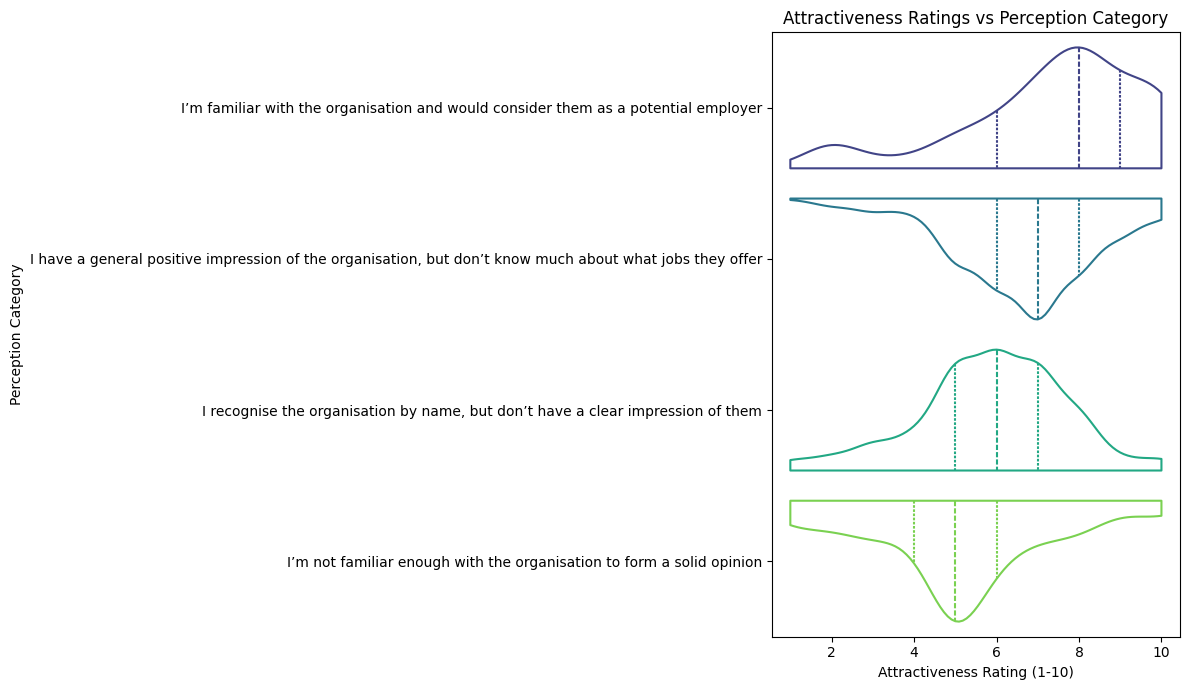

In [ ]:
col_order = ["I’m familiar with the organisation and would consider them as a potential employer",
             "I have a general positive impression of the organisation, but don’t know much about what jobs they offer",
             "I recognise the organisation by name, but don’t have a clear impression of them",
             "I’m not familiar enough with the organisation to form a solid opinion"]
plt.figure(figsize=(12, 7))
sns.violinplot(x='scale(1-10)',
               y='perception',
               data=perception_rating_data,
               palette='viridis',
               inner='quartile',
               fill=False,
               split=True,
               cut=0,
               order=col_order)
plt.title('Attractiveness Ratings vs Perception Category')
plt.xlabel('Attractiveness Rating (1-10)')
plt.ylabel('Perception Category')
plt.tight_layout()
plt.show()

/tmp/ipython-input-647750896.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='scale(1-10)', y='perception', data=perception_rating_data, palette='viridis')


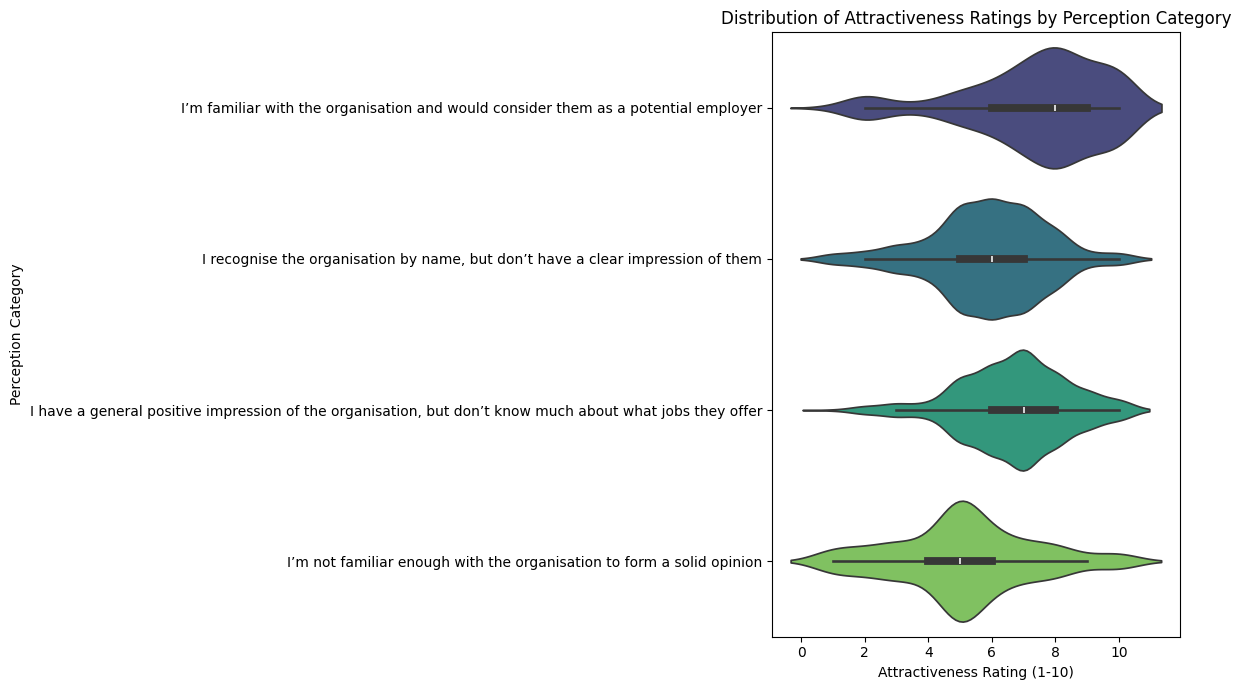

In [ ]:
plt.figure(figsize=(12, 7))
sns.violinplot(x='scale(1-10)', y='perception', data=perception_rating_data, palette='viridis')
plt.title('Distribution of Attractiveness Ratings by Perception Category')
plt.xlabel('Attractiveness Rating (1-10)')
plt.ylabel('Perception Category')
# Removed xticks rotation as categories are now on the y-axis, which is typically horizontal
plt.tight_layout()
plt.show()

This plot confirms that how people perceive the organization has a big impact on how they rate its attractiveness. Respondents who are already familiar with the organization and see it as a potential employer consistently give the highest attractiveness ratings (scale 8-10). Those with a general positive impression also rate it highly, but their ratings are a bit more varied, spreading across a slightly wider range (6-9). Those who only know the organization's name but don't have a clear impression, their ratings tend to cluster in the middle of the scale (5-7), and their opinions are more diverse. The lowest ratings, and the most spread-out 'violins', come from those who aren't familiar enough to form an opinion. This suggests that when people are uninformed, they either rate lower by default or their ratings are more random guesses.

# Task
Acknowledge that `plot_data_complete` was indeed defined in a previous execution, even if the cell is not currently visible in the notebook, as indicated by the 'Kernel State'.

The user has approved the plan to generate a point plot. Proceed to create a point plot visualizing the mean attractiveness rating by perception category using the `perception_stats_reset` DataFrame.

## Acknowledge and Explain

### Subtask:
Acknowledge the user's observation regarding `plot_data_complete` and explain its previous definition based on the kernel state. Reiterate the plan to generate a point plot.


### Acknowledge and Explain

I acknowledge the observation regarding `plot_data_complete` not being explicitly visible in the current notebook. However, based on the provided 'Kernel State' information, it is clear that `plot_data_complete` was successfully defined in a previous execution. The kernel state shows `plot_data_complete` as a `DataFrame` with its content, confirming its existence and successful creation in an earlier step.

As previously discussed and approved, the next step is to generate a point plot visualizing the mean attractiveness rating by perception category. This plot will utilize the `perception_stats_reset` DataFrame, which contains the aggregated statistics for each perception category, including the mean and standard deviation of the attractiveness ratings.

**Reasoning**:
The previous code block failed because 'plot_data_complete' was not defined in the current execution flow. Based on the kernel state, 'grad_complete' is available and contains the necessary data for complete surveys. I need to convert 'grad_complete' to include 'time_taken_seconds' and rename it to 'plot_data_complete' to fix the error and proceed with the plotting.



update for the message above: I've moved the plot_data_complete variable up such that the rest of the code loads yay good job (can we remove it haha)

# Similarity Analysis using NLP

removing redundancies of similar survey questions

In [ ]:
survey_questions = [
    """Which higher education institution do you or did you study at?""",
    """ What is your current year of study as of 2025? """,
    """What will be your highest qualification when you graduate? """,
    """Which of the following best describes the main subject that you are studying?""",
    """Please indicate your nationality.""",
    """What is your gender?""",
    """Which of these statements best describes your current perception of (Employer) as an employer?""",
    """Types of roles available:What do you wish to learn more about regarding (Employer) as an employer? (Pick 3)""",
    """Career progression and development:What do you wish to learn more about regarding (Employer) as an employer? (Pick 3)""",
    """Compensation and benefits:What do you wish to learn more about regarding (Employer) as an employer? (Pick 3)""",
    """Work-life balance and culture:What do you wish to learn more about regarding (Employer) as an employer? (Pick 3)""",
    """Application and interview process:What do you wish to learn more about regarding (Employer) as an employer? (Pick 3)""",
    """Other - Write In (Required):What do you wish to learn more about regarding (Employer) as an employer? (Pick 3)""",
    """Other - Write In (Required):What do you wish to learn more about regarding (Employer) as an employer? (Pick 3)""",
    """On a scale from 1 to 10 (1 – Low, 10 – High), how would you rate the attractiveness of (Employer) as an employer?""",
    """Which of these factors would most motivate you to apply for a position at (Employer)?""",
    """Other - Write In (Required):Which of these factors would most motivate you to apply for a position at (Employer)?"""
]

In [ ]:
df_questions = pd.DataFrame({"abbreviation": ['university', 'year_of_Study', 'highest_qualification', 'major', 'nationality', 'gender', 'perception', 'types_of_roles', 'career_progression', 'compensation', 'worklife_balance', 'interview_process',
                    'other_1', 'other_2', 'scale(1-10)', 'motivation_factor', 'other'], "question": survey_questions})
df_questions.head() # to inspect the dataframe

,abbreviation,question
0,university,Which higher education institution do you or d...
1,year_of_Study,What is your current year of study as of 2025?
2,highest_qualification,What will be your highest qualification when y...
3,major,Which of the following best describes the main...
4,nationality,Please indicate your nationality.


## NLP Usage

Checking similarity by turning texts into embeddings (numeric values), then checking similarity using cosine similarity.

the following code transforms texts into embeddings

In [ ]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("all-MiniLM-L6-v2")

embeddings = model.encode(
    df_questions["question"].tolist(),
    convert_to_tensor=False
)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(embeddings)

similarity_df = pd.DataFrame(
    similarity_matrix,
    index=df_questions["abbreviation"],
    columns=df_questions["abbreviation"]
)

similarity_df

abbreviation,university,year_of_Study,highest_qualification,major,nationality,gender,perception,types_of_roles,career_progression,compensation,worklife_balance,interview_process,other_1,other_2,scale(1-10),motivation_factor,other
abbreviation,,,,,,,,,,,,,,,,,
university,1.000000,0.422566,0.456479,0.412724,0.208614,0.202457,0.171344,0.217483,0.281586,0.217562,0.218129,0.245642,0.244174,0.244174,0.087303,0.179120,0.141615
year_of_Study,0.422566,1.000000,0.516057,0.444945,0.241145,0.238633,0.196118,0.174271,0.307789,0.180932,0.207043,0.169563,0.198723,0.198723,0.081071,0.137263,0.117841
highest_qualification,0.456479,0.516057,1.000000,0.435206,0.255143,0.184668,0.282284,0.312585,0.384122,0.295915,0.259165,0.301603,0.312764,0.312764,0.245598,0.359848,0.334002
major,0.412724,0.444945,0.435206,1.000000,0.148449,0.186635,0.246925,0.375496,0.367636,0.230479,0.277985,0.284590,0.358848,0.358848,0.103965,0.322356,0.293860
nationality,0.208614,0.241145,0.255143,0.148449,1.000000,0.357389,0.083520,0.089787,0.060122,0.087341,0.149652,0.100704,0.042478,0.042478,0.090804,0.154469,0.081527
gender,0.202457,0.238633,0.184668,0.186635,0.357389,1.000000,0.072846,0.111891,0.039760,0.081867,0.084102,0.053301,0.033188,0.033188,0.067452,0.075926,0.017498
perception,0.171344,0.196118,0.282284,0.246925,0.083520,0.072846,1.000000,0.601897,0.680133,0.693485,0.628350,0.650949,0.612908,0.612908,0.531099,0.580130,0.489341
types_of_roles,0.217483,0.174271,0.312585,0.375496,0.089787,0.111891,0.601897,1.000000,0.790705,0.723264,0.645172,0.765816,0.731993,0.731993,0.360217,0.489241,0.422291
career_progression,0.281586,0.307789,0.384122,0.367636,0.060122,0.039760,0.680133,0.790705,1.000000,0.766079,0.745941,0.817777,0.749697,0.749697,0.368559,0.480006,0.385639


the following code shows a similarity matrix between questions

In [ ]:
redundant_pairs = []

threshold = 0.7  # similarity threshold, such that the redundant questions are properly recognised by the NLP transformer

# Create a mapping from full question text (stripped of whitespace) to its abbreviation
question_to_abbreviation = df_questions.set_index(df_questions['question'].str.strip())['abbreviation'].to_dict()

for i in range(len(survey_questions)):
    for j in range(i + 1, len(survey_questions)):
        score = similarity_matrix[i][j]
        if score >= threshold:
            q1_full_stripped = survey_questions[i].strip()
            q2_full_stripped = survey_questions[j].strip()
            redundant_pairs.append({
                "Question 1": question_to_abbreviation.get(q1_full_stripped, q1_full_stripped), # Use abbreviation or full if not found
                "Question 2": question_to_abbreviation.get(q2_full_stripped, q2_full_stripped),
                "Similarity": round(score, 2)
            })

redundant_df = pd.DataFrame(redundant_pairs)
redundant_df

,Question 1,Question 2,Similarity
0,types_of_roles,career_progression,0.79
1,types_of_roles,compensation,0.72
2,types_of_roles,interview_process,0.77
3,types_of_roles,other_2,0.73
4,types_of_roles,other_2,0.73
5,career_progression,compensation,0.77
6,career_progression,worklife_balance,0.75
7,career_progression,interview_process,0.82
8,career_progression,other_2,0.75
9,career_progression,other_2,0.75


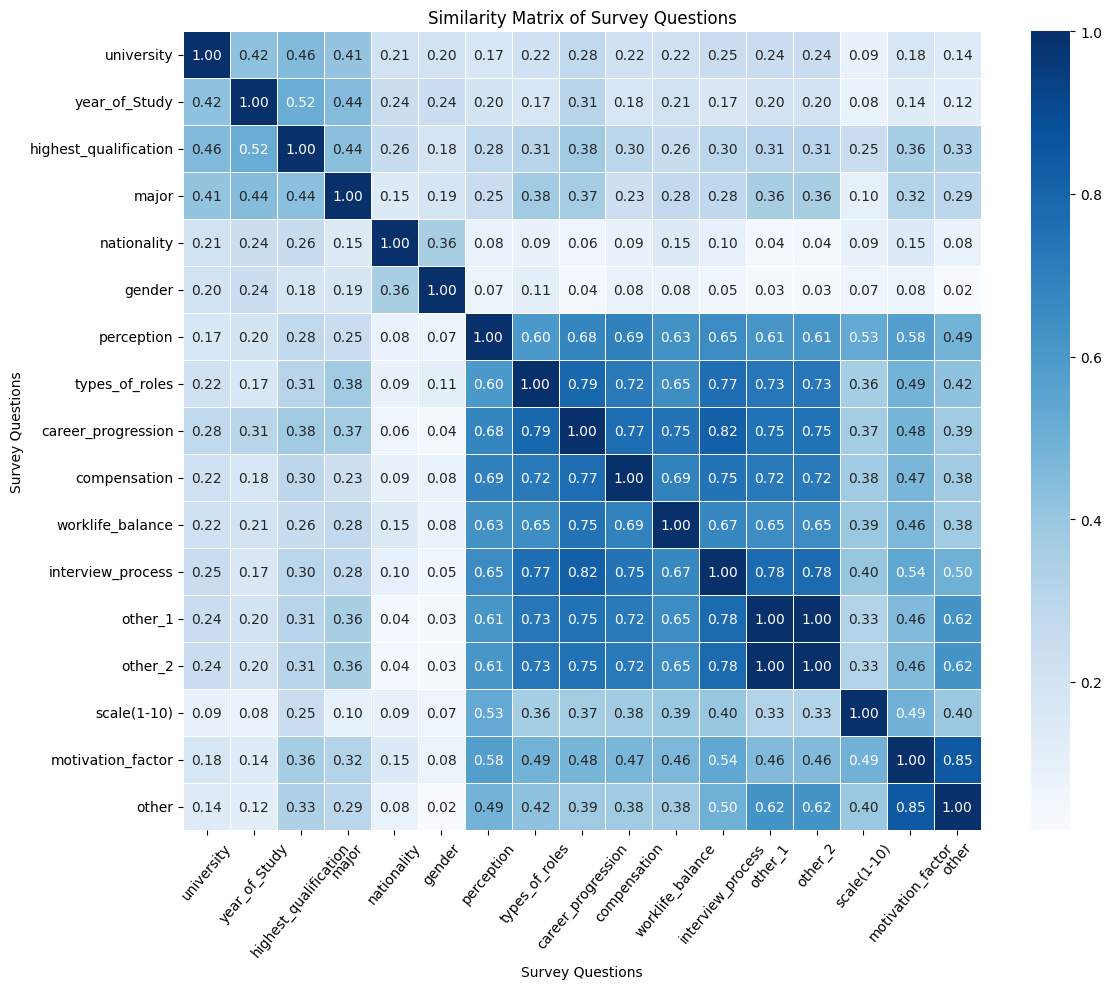

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(similarity_df, annot=True, cmap='Blues', fmt='.2f', linewidths=.5)
plt.title('Similarity Matrix of Survey Questions')
plt.xlabel('Survey Questions')
plt.ylabel('Survey Questions')
plt.xticks(rotation=50)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

the code below is to detect themes of survey questions using k-means clustering

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=41)
labels = kmeans.fit_predict(embeddings)

df_questions["cluster"] = labels

# Define the theme mapping based on the identified clusters
theme_mapping = {
    0: "general demography",
    1: "applicant's expectation on employer",
    2: "education status of applicant",
    3: "employer attractiveness"
}

# Add the 'theme of question' column using the mapping
# df_questions["theme of question"] = df_questions["cluster"].map(theme_mapping)

df_questions

## comments: can cluster either 3 or 4 because theme 2 and 3 overlaps (can be combined as a cluster)

,abbreviation,question,cluster
0,university,Which higher education institution do you or d...,2
1,year_of_Study,What is your current year of study as of 2025?,2
2,highest_qualification,What will be your highest qualification when y...,2
3,major,Which of the following best describes the main...,2
4,nationality,Please indicate your nationality.,0
5,gender,What is your gender?,0
6,perception,Which of these statements best describes your ...,1
7,types_of_roles,Types of roles available:What do you wish to l...,1
8,career_progression,Career progression and development:What do you...,1
9,compensation,Compensation and benefits:What do you wish to ...,1


In [ ]:
nlp_findings = {
    "redundant_questions": redundant_pairs,
    "themes": df_questions.groupby("cluster")["abbreviation"].apply(list).to_dict()
}

nlp_findings

{'redundant_questions': [{'Question 1': 'types_of_roles',
   'Question 2': 'career_progression',
   'Similarity': np.float32(0.79)},
  {'Question 1': 'types_of_roles',
   'Question 2': 'compensation',
   'Similarity': np.float32(0.72)},
  {'Question 1': 'types_of_roles',
   'Question 2': 'interview_process',
   'Similarity': np.float32(0.77)},
  {'Question 1': 'types_of_roles',
   'Question 2': 'other_2',
   'Similarity': np.float32(0.73)},
  {'Question 1': 'types_of_roles',
   'Question 2': 'other_2',
   'Similarity': np.float32(0.73)},
  {'Question 1': 'career_progression',
   'Question 2': 'compensation',
   'Similarity': np.float32(0.77)},
  {'Question 1': 'career_progression',
   'Question 2': 'worklife_balance',
   'Similarity': np.float32(0.75)},
  {'Question 1': 'career_progression',
   'Question 2': 'interview_process',
   'Similarity': np.float32(0.82)},
  {'Question 1': 'career_progression',
   'Question 2': 'other_2',
   'Similarity': np.float32(0.75)},
  {'Question 1': 'ca

from nlp_findings:
- we found similarities and redundancies between one question and another.
- discovered 4 themes in the survey: general demography, education status, employer attractiveness, what-to-gain from the employer.

a suggestion, considering the presence of different themes in the survey: create pages based on the themes, each page consists of questions that belong to the theme.

# Demographic and Behavioural Segmentation

splitting data into **data_demographic** from grad_clean by including demographic features

In [ ]:
# Extracting demographic features based on NLP analysis
demographic_abbreviations = ['university', 'year_of_Study', 'highest_qualification', 'major', 'nationality', 'gender']

data_demographic = grad_clean[demographic_abbreviations].copy()

print("Demographic features in data_demographic:")
print(data_demographic.head())

Demographic features in data_demographic:
                               university year_of_Study highest_qualification  \
0  National University of Singapore (NUS)        Year 4     Bachelor's Degree   
1   Singapore Management University (SMU)        Year 3     Bachelor's Degree   
2   Singapore Management University (SMU)        Year 3     Bachelor's Degree   
3  Nanyang Technological University (NTU)        Year 4     Bachelor's Degree   
4                                     NaN           NaN                   NaN   

                                               major  \
0  Business/Management (Accounting, Finance, Mark...   
1                                          Economics   
2                                          Economics   
3                                          Economics   
4                                                NaN   

                                        nationality  gender  
0                          Singaporean/Singapore PR  Female  
1         

In [ ]:
demographic_encoded = pd.get_dummies(data_demographic.fillna('Missing'), drop_first=True)

# Standardise the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
demographic_scaled = scaler.fit_transform(demographic_encoded)

print("demographic_scaled has been created and contains:")
print(demographic_scaled[:5]) # Display first 5 rows to confirm creation

demographic_scaled has been created and contains:
[[-0.04796471 -0.03914801 -0.05181774 -0.03389668 -0.03389668 -0.06500687
  -0.03389668 -0.03914801 -0.07337994 -0.01956277 -0.31722481 -0.05877835
  -0.48993668 -0.08556736  0.81480571 -0.07847664 -0.05877835 -0.02767123
  -0.11649529 -0.07069708 -0.16094306 -0.03389668 -0.04796471 -0.03914801
  -0.15063766 -0.09626219 -0.70082667 -0.58765828 -0.49053693  2.72123955
  -0.09212847 -0.12306759 -0.03914801 -0.31795471 -0.1246596  -0.15327283
   2.83086437 -0.10591774 -0.24145309 -0.10216065 -0.27356083 -0.07337994
  -0.13821474 -0.06196972 -0.26950006 -0.03914801 -0.05877835 -0.42379581
  -0.08780718 -0.26207549 -0.31795471 -0.56939862 -0.06791051 -0.16829781
  -0.10591774 -0.28861531 -0.25619117  0.54699613 -0.72647198 -0.31868355
  -0.16949586]
 [-0.04796471 -0.03914801 -0.05181774 -0.03389668 -0.03389668 -0.06500687
  -0.03389668 -0.03914801 -0.07337994 -0.01956277 -0.31722481 -0.05877835
  -0.48993668 -0.08556736 -1.22728645 -0.078476

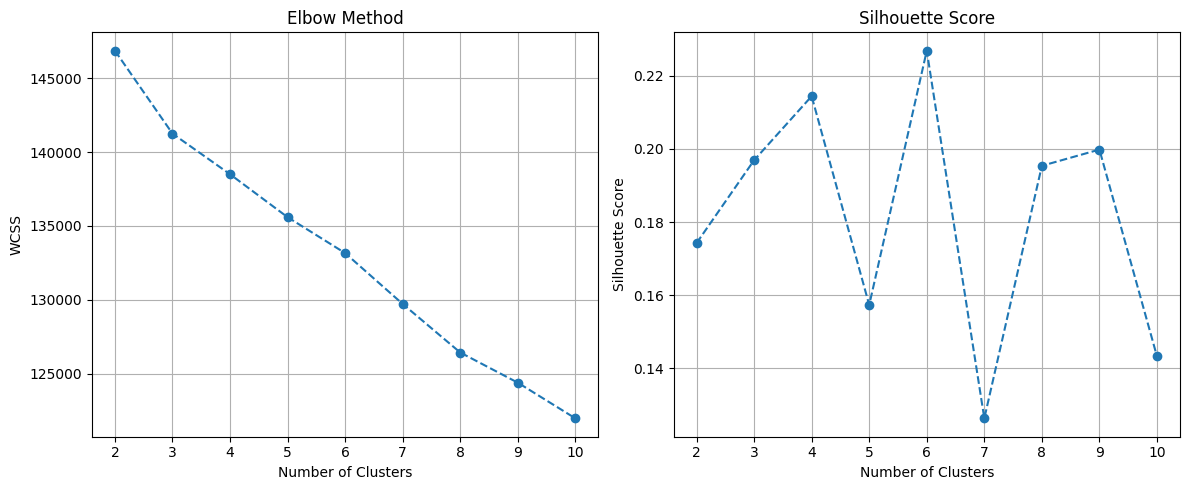

In [ ]:
# Determine optimal number of clusters using Elbow Method and Silhouette Score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

wcss = []
silhouette_scores = []

# Range of clusters to test
max_clusters = 10
possible_clusters = range(2, max_clusters + 1)

for i in possible_clusters:
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(demographic_scaled)
    wcss.append(kmeans.inertia_)
    score = silhouette_score(demographic_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# Plotting the Elbow Method
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(possible_clusters, wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)

# Plotting the Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(possible_clusters, silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.tight_layout()
plt.show()


there is a slight bend between k=3 and k=4 in the elbow method, but the silhouette scores reflect <0.25 for every k=1 to k=10. Although, k=6 is the highest.

We chose k=3 as we wish for the renewed survey to reach out a broad audience instead of niche/small ones.

Applying 3-means clustering on data_demographic to find meaningful clusters

K-Means clustering applied with 3 clusters.
cluster
2    1577
1     797
0     240
Name: count, dtype: int64


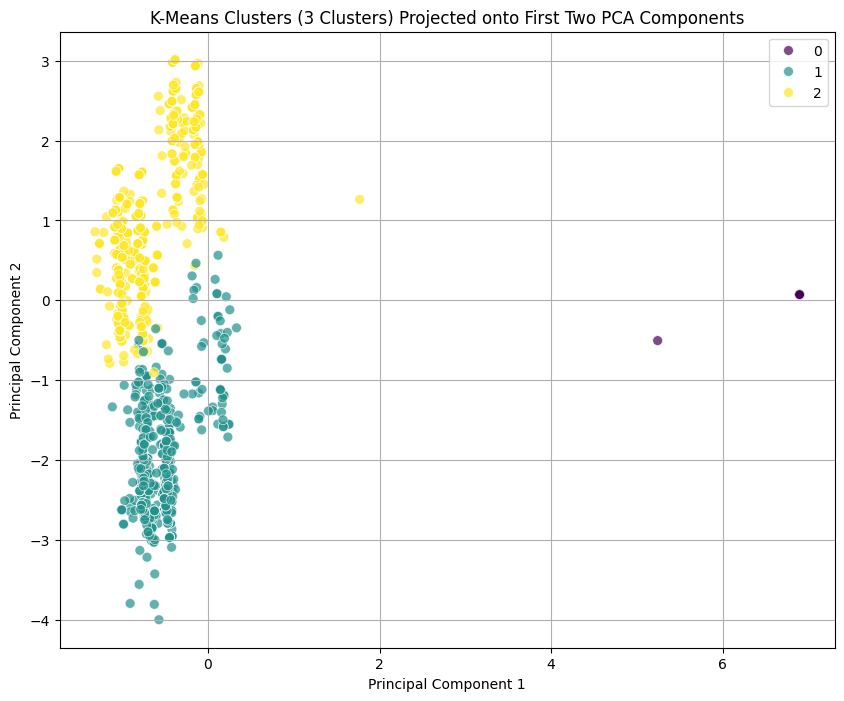


Data with cluster labels:
                               university year_of_Study highest_qualification  \
0  National University of Singapore (NUS)        Year 4     Bachelor's Degree   
1   Singapore Management University (SMU)        Year 3     Bachelor's Degree   
2   Singapore Management University (SMU)        Year 3     Bachelor's Degree   
3  Nanyang Technological University (NTU)        Year 4     Bachelor's Degree   
4                                     NaN           NaN                   NaN   

                                               major  \
0  Business/Management (Accounting, Finance, Mark...   
1                                          Economics   
2                                          Economics   
3                                          Economics   
4                                                NaN   

                                        nationality  gender  cluster  
0                          Singaporean/Singapore PR  Female        2  
1      

In [ ]:
# Apply K-Means clustering to the scaled demographic data
from sklearn.cluster import KMeans

# Choose k = 3
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(demographic_scaled)

# Add the cluster labels back to the original demographic DataFrame (or encoded DataFrame)
data_demographic_clusters = data_demographic.copy()
data_demographic_clusters['cluster'] = cluster_labels

print(f"K-Means clustering applied with {n_clusters} clusters.")
print(data_demographic_clusters['cluster'].value_counts())

# Visualize the clusters using the first two principal components
# Assuming pcaX (PCA scores) was previously calculated and is available.

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=pcaX[:, 0],
    y=pcaX[:, 1],
    hue=cluster_labels,
    palette='viridis',
    legend='full',
    s=50, alpha=0.7
)
plt.title(f'K-Means Clusters ({n_clusters} Clusters) Projected onto First Two PCA Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# Display the first few rows with cluster labels
print("\nData with cluster labels:")
print(data_demographic_clusters.head())

In [ ]:
print('--- Cluster Characteristics Analysis ---')

for cluster_id in sorted(data_demographic_clusters['cluster'].unique()):
    print(f'\n--- Characteristics for Cluster {cluster_id} ---')
    cluster_data = data_demographic_clusters[data_demographic_clusters['cluster'] == cluster_id]

    for col in ['university', 'year_of_Study', 'highest_qualification', 'major', 'nationality', 'gender']:
        print(f'\n{col}:')
        # Get value counts, excluding NaN (or 'Missing' if it was filled earlier), and normalize to show proportions
        counts = cluster_data[col].value_counts(dropna=True, normalize=True).head(4)
        if not counts.empty:
            print(counts)
        else:
            print('No data for this category in this cluster.')






--- Cluster Characteristics Analysis ---

--- Characteristics for Cluster 0 ---

university:
university
Yale-NUS College    1.0
Name: proportion, dtype: float64

year_of_Study:
No data for this category in this cluster.

highest_qualification:
No data for this category in this cluster.

major:
No data for this category in this cluster.

nationality:
No data for this category in this cluster.

gender:
No data for this category in this cluster.

--- Characteristics for Cluster 1 ---

university:
university
Nanyang Technological University (NTU)    0.634881
Singapore Management University (SMU)     0.082811
Yale-NUS College                          0.067754
SIM Global Education                      0.043915
Name: proportion, dtype: float64

year_of_Study:
year_of_Study
Year 1    0.385194
Year 2    0.327478
Year 3    0.200753
Year 4    0.061481
Name: proportion, dtype: float64

highest_qualification:
highest_qualification
Bachelor's Degree                   0.938519
Master's Degree        

## Demographically, there are 3 clusters:

Cluster 0: 240 respondents from Yale-NUS students with no demographic information.

Cluster 1: 797 respondents.
- Respondents are mostly from Nanyang Technological University (NTU) and a small fraction of other universities.
- Most respondents in descending order are Freshmen, Sophomore, and Penultimate students studying Business/Management, Engineering, Economics, and IT and Technology.
- Most respondents' highest qualifications are Bachelor's degree, with a small fraction of, in order from most common to least common, Master's degree, Postgraduate certificate/diploma, and Doctoral's degree.

Cluster 2: 1577 respondents
- almost every respondent are from National University of Singapore (up to 99.7%).
- Most respondents are pursuing subjects in the science field, in descending order by population: Natural Sciences, Mathematics Science/Statistics, and Medicine, Dentistry, etc.
- Similar to cluster 1, most respondents' highest qualifications are bachelor's degree, with a small fraction of, in order from most common to least common, Postgraduate certificate/diploma, Master's degree, and Doctoral's degree.

The two known clusters (Cluster 1 and 2) are dominated by Singaporean/Singapore PR, with more female respondents.

/tmp/ipython-input-3466182022.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cluster', y='count', data=demographic_cluster_counts, palette='dark:#52B69A')


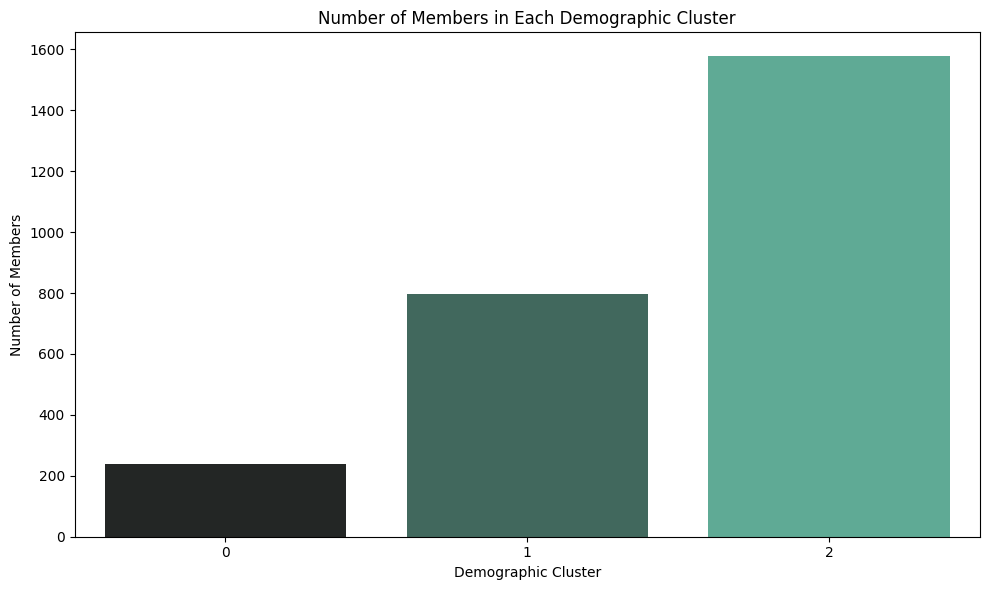

In [ ]:
# Calculate the number of members in each demographic cluster
demographic_cluster_counts = data_demographic_clusters['cluster'].value_counts().reset_index()
demographic_cluster_counts.columns = ['cluster', 'count'] # Rename columns for clarity

plt.figure(figsize=(10, 6))
sns.barplot(x='cluster', y='count', data=demographic_cluster_counts, palette='dark:#52B69A')
plt.title('Number of Members in Each Demographic Cluster')
plt.xlabel('Demographic Cluster')
plt.ylabel('Number of Members')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

below is the same procedure to find behavioural segments within respondents.

In [ ]:
behavioral_columns = [
    'perception',
    'types_of_roles',
    'career_progression',
    'compensation',
    'worklife_balance',
    'interview_process',
    'scale(1-10)',
    'motivation_factor'
]

data_behavioural = grad_clean[behavioral_columns].copy()

print("Behavioral features in data_behavioural:")
print(data_behavioural.head())

Behavioral features in data_behavioural:
                                          perception  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3  I’m familiar with the organisation and would c...   
4                                                NaN   

             types_of_roles                  career_progression compensation  \
0                       NaN                                 NaN          NaN   
1                       NaN                                 NaN          NaN   
2                       NaN                                 NaN          NaN   
3  Types of roles available  Career progression and development          NaN   
4                       NaN                                 NaN          NaN   

  worklife_balance                  interview_process  scale(1-10)  \
0              NaN                                NaN          NaN   
1

data_behavioural

In [ ]:
behavioral_encoded = pd.get_dummies(data_behavioural.fillna('Missing'), drop_first=True)

print("behavioral_encoded has been created and contains:")
print(behavioral_encoded.head()) # Display first 5 rows to confirm creation

behavioral_encoded has been created and contains:
   perception_I recognise the organisation by name, but don’t have a clear impression of them  \
0                                              False                                            
1                                              False                                            
2                                              False                                            
3                                              False                                            
4                                              False                                            

   perception_I’m familiar with the organisation and would consider them as a potential employer  \
0                                              False                                               
1                                              False                                               
2                                              False               

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
behavioral_scaled = scaler.fit_transform(behavioral_encoded)

print("behavioral_scaled has been created and contains:")
print(behavioral_scaled[:5]) # Display first 5 rows to confirm creation

behavioral_scaled has been created and contains:
[[-0.52452069 -0.40861264 -0.3970663   1.55466828 -1.08467487  1.0632024
   0.91415215 -0.79672563  0.50668607 -0.16587864 -0.18444237 -0.18774324
  -0.39577414 -0.3734894  -0.40413968 -0.34705299 -0.22221107 -0.2193524
   1.55323296 -0.18774324 -0.32734994 -0.20150706 -0.57116577  1.55323296
  -0.05181774 -0.39577414]
 [-0.52452069 -0.40861264 -0.3970663   1.55466828 -1.08467487  1.0632024
   0.91415215 -0.79672563  0.50668607 -0.16587864 -0.18444237 -0.18774324
  -0.39577414 -0.3734894  -0.40413968 -0.34705299 -0.22221107 -0.2193524
   1.55323296 -0.18774324 -0.32734994 -0.20150706 -0.57116577  1.55323296
  -0.05181774 -0.39577414]
 [-0.52452069 -0.40861264 -0.3970663   1.55466828 -1.08467487  1.0632024
   0.91415215 -0.79672563  0.50668607 -0.16587864 -0.18444237 -0.18774324
  -0.39577414 -0.3734894  -0.40413968 -0.34705299 -0.22221107 -0.2193524
   1.55323296 -0.18774324 -0.32734994 -0.20150706 -0.57116577  1.55323296
  -0.05181774 -

In [ ]:
from sklearn.cluster import KMeans

n_clusters = 4
kmeans_behavioral = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
cluster_labels_behavioral = kmeans_behavioral.fit_predict(behavioral_scaled)

data_behavioural_clusters = data_behavioural.copy()
data_behavioural_clusters['cluster'] = cluster_labels_behavioral

print(f"K-Means clustering applied with {n_clusters} clusters.")
print("Distribution of data points across behavioral clusters:")
print(data_behavioural_clusters['cluster'].value_counts())

K-Means clustering applied with 4 clusters.
Distribution of data points across behavioral clusters:
cluster
0    945
1    766
3    549
2    354
Name: count, dtype: int64


In [ ]:
print('--- Behavioral Cluster Characteristics Analysis ---')

for cluster_id in sorted(data_behavioural_clusters['cluster'].unique()):
    print(f'\n--- Characteristics for Cluster {cluster_id} ---')
    cluster_data = data_behavioural_clusters[data_behavioural_clusters['cluster'] == cluster_id]

    for col in behavioral_columns:
        print(f'\n{col}:')
        # Get value counts, excluding NaN (or 'Missing' if it was filled earlier), and normalize to show proportions
        counts = cluster_data[col].value_counts(dropna=False, normalize=True).head(3)
        if not counts.empty:
            print(counts)
        else:
            print('No data for this category in this cluster.')

--- Behavioral Cluster Characteristics Analysis ---

--- Characteristics for Cluster 0 ---

perception:
perception
I recognise the organisation by name, but don’t have a clear impression of them                             0.368254
I have a general positive impression of the organisation, but don’t know much about what jobs they offer    0.326984
I’m not familiar enough with the organisation to form a solid opinion                                       0.188360
Name: proportion, dtype: float64

types_of_roles:
types_of_roles
Types of roles available    0.762963
NaN                         0.237037
Name: proportion, dtype: float64

career_progression:
career_progression
Career progression and development    0.730159
NaN                                   0.269841
Name: proportion, dtype: float64

compensation:
compensation
Compensation and benefits    0.635979
NaN                          0.364021
Name: proportion, dtype: float64

worklife_balance:
worklife_balance
Work-life balance and 

Cluster 0 (945 respondents):
- Most respondents recognise the organization by name but don’t have a clear impression, or have a general positive impression but don’t know much about job offerings.
- They rate 6-7 for employer attractiveness rating.
- They are primarily motivated by meaningful work impact, career growth opportunities, and work-life balance.

Cluster 1 (766 respondents):
- There are many missing data across all behavioral columns, including perception, types of roles, career progression, compensation, work-life balance, interview process, scale(1-10), and motivation factor.
- This suggests that these respondents did not complete these sections of the survey or were disqualified.

Cluster 2 (354 respondents):
- Most respondents in this cluster are either not familiar enough to form an opinion or only recognise the organization by name without a clear impression. Their attractiveness rating is consistently 5.
- Similar to Cluster 0, they are motivated by meaningful work impact, work-life balance, and career growth opportunities.

Cluster 3 (549 respondents):
- Most respondents in this cluster are familiar with the organisation and would consider them as a potential employer, or have a general positive impression.
- They give the highest attractiveness ratings, primarily 8, 9, or 10.
Their top motivations are meaningful work impact, career growth opportunities, and job security.

/tmp/ipython-input-3939430392.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cluster', y='count', data=cluster_counts, palette='dark:#52B69A')


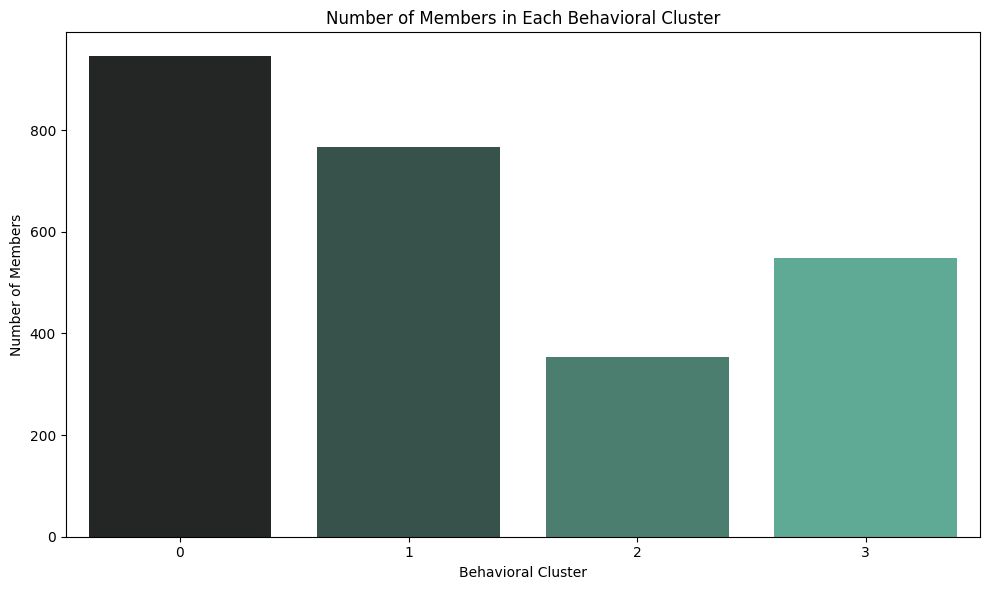

In [ ]:
# Calculate the number of members in each behavioral cluster
cluster_counts = data_behavioural_clusters['cluster'].value_counts().reset_index()
cluster_counts.columns = ['cluster', 'count'] # Rename columns for clarity

plt.figure(figsize=(10, 6))
sns.barplot(x='cluster', y='count', data=cluster_counts, palette='dark:#52B69A')
plt.title('Number of Members in Each Behavioral Cluster')
plt.xlabel('Behavioral Cluster')
plt.ylabel('Number of Members')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()